<h1>Weighting and Aggregation</h1>

There are 6 subindicies that are going to be used to build the composite index for Digital Readiness.

- Access & Connectivity
- Digital Governance Participation
- Digital Trade Economy
- Education Human Capital
- Infrastructure Security
- Innovation R&D

| Sub Index | Weighting |
|--|--|
| Access & Connectivity | 0.25 |
| Digital Governance Participation | 0.20 |
| Digital Trade Economy | 0.15 |
| Education Human Capital | 0.10 |
| Infrastructure Security | 0.20 |
| Innovation R&D | 0.10 |

In [30]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [5]:
access = pd.read_csv("cleaned_sub_indices/access_connectivity_minmax.csv", index_col=0)
governance = pd.read_csv("cleaned_sub_indices/digital_governance_participation_minmax.csv", index_col=0)
trade = pd.read_csv("cleaned_sub_indices/digital_trade_economy_minmax.csv", index_col=0)
education = pd.read_csv("cleaned_sub_indices/education_human_capital_minmax.csv", index_col=0)
infrastructure = pd.read_csv("cleaned_sub_indices/infrastructure_security_minmax.csv", index_col=0)
innovation = pd.read_csv("cleaned_sub_indices/innovation_rd_minmax.csv", index_col=0)

access["score"] = access.mean(axis=1)
governance["score"] = governance.mean(axis=1)
trade["score"] = trade.mean(axis=1)
education["score"] = education.mean(axis=1)
infrastructure["score"] = infrastructure.mean(axis=1)
innovation["score"] = innovation.mean(axis=1)

composite = pd.DataFrame(index=access.index)
composite["Access & Connectivity"] = access["score"] * 0.25
composite["Digital Governance Participation"] = governance["score"] * 0.20
composite["Digital Trade Economy"] = trade["score"] * 0.15
composite["Education Human Capital"] = education["score"] * 0.10
composite["Infrastructure Security"] = infrastructure["score"] * 0.20
composite["Innovation R&D"] = innovation["score"] * 0.10

composite["Composite Index"] = composite.sum(axis=1)

composite_sorted = composite.sort_values("Composite Index", ascending=False)

print(composite_sorted.head(10))
print(composite_sorted.tail(10))
composite_sorted.to_csv("composite_index.csv")

                          Access & Connectivity  \
Country                                           
China                                  0.227626   
Israel                                 0.182663   
Singapore                              0.187057   
Iceland                                0.189911   
Denmark                                0.206963   
Estonia                                0.215960   
United States of America               0.191424   
United Kingdom                         0.198648   
Germany                                0.209133   
Switzerland                            0.217370   

                          Digital Governance Participation  \
Country                                                      
China                                             0.180465   
Israel                                            0.160500   
Singapore                                         0.194135   
Iceland                                           0.193905   
Denmark        

In [11]:
composite_reset = composite_sorted.reset_index()
composite_reset.columns = ['Country', 'Access & Connectivity', 'Digital Governance Participation',
                           'Digital Trade Economy', 'Education Human Capital',
                           'Infrastructure Security', 'Innovation R&D', 'Composite Index']

fig = px.choropleth(
    composite_reset,
    locations="Country",
    locationmode="country names",
    color="Composite Index",
    color_continuous_scale="Viridis",
    title="Composite Index by Country",
)

fig.show()

In [7]:
df = pd.read_csv("composite_index.csv")
top_10 = df.sort_values(by="Composite Index", ascending=False).head(10)

bottom_10 = df.sort_values(by="Composite Index", ascending=True).head(10)

print("Top 10 countries:")
print(top_10[["Country", "Composite Index"]])

print("\nBottom 10 countries:")
print(bottom_10[["Country", "Composite Index"]])

Top 10 countries:
                    Country  Composite Index
0                     China         0.749624
1                    Israel         0.740801
2                 Singapore         0.730275
3                   Iceland         0.727547
4                   Denmark         0.725608
5                   Estonia         0.720661
6  United States of America         0.719031
7            United Kingdom         0.718998
8                   Germany         0.715047
9               Switzerland         0.714789

Bottom 10 countries:
                      Country  Composite Index
177  Central African Republic         0.041476
176               Afghanistan         0.095430
175                   Liberia         0.119589
174                     Niger         0.125786
173                Mozambique         0.127059
172                  Ethiopia         0.134116
171              Burkina Faso         0.141519
170                   Burundi         0.143235
169                     Yemen         0.15

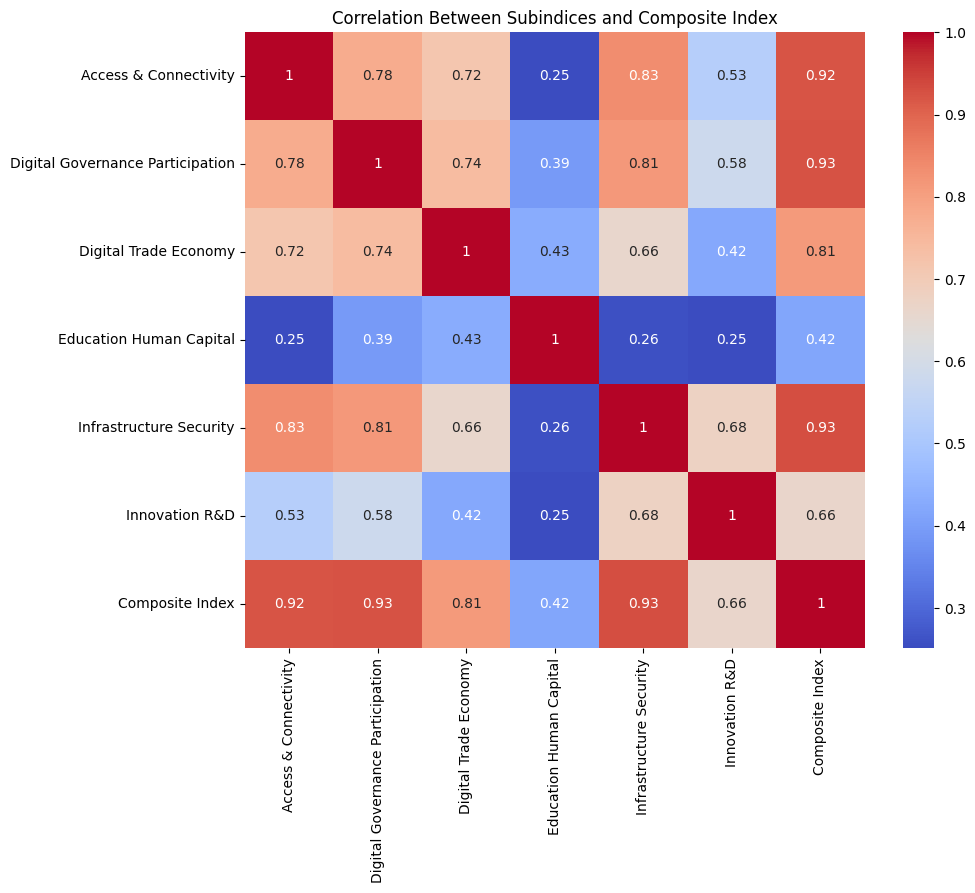

In [8]:
numeric_df = df.drop(columns=["Country"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Subindices and Composite Index")
plt.show()


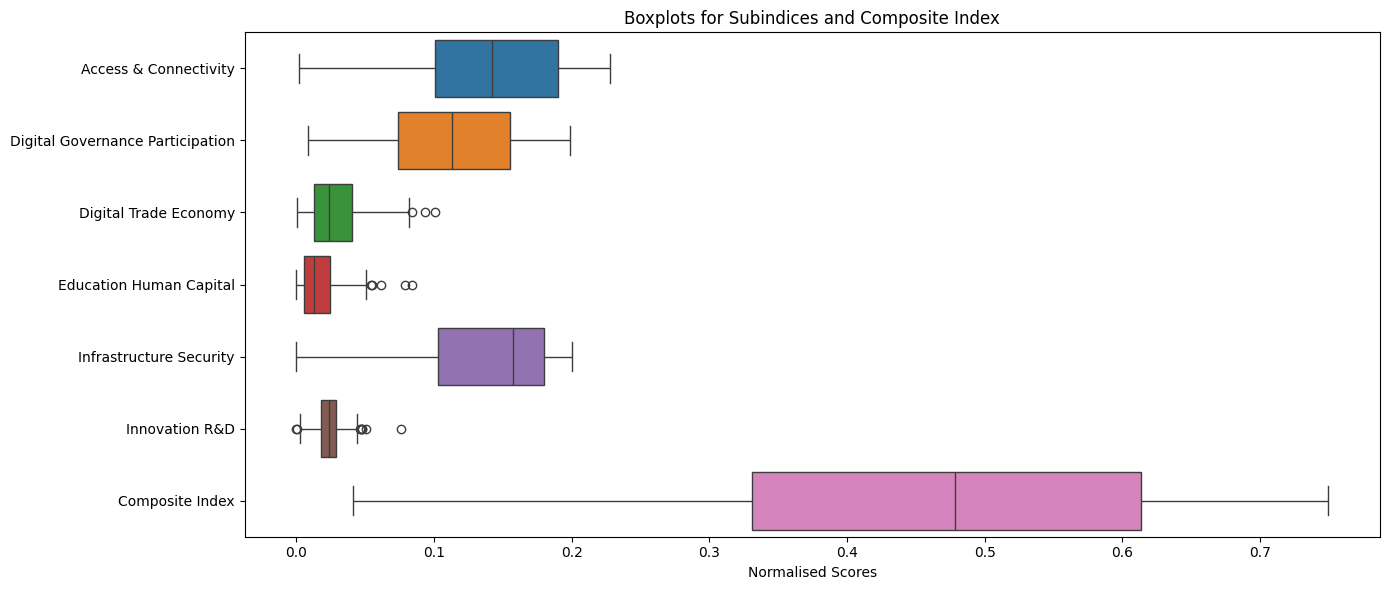

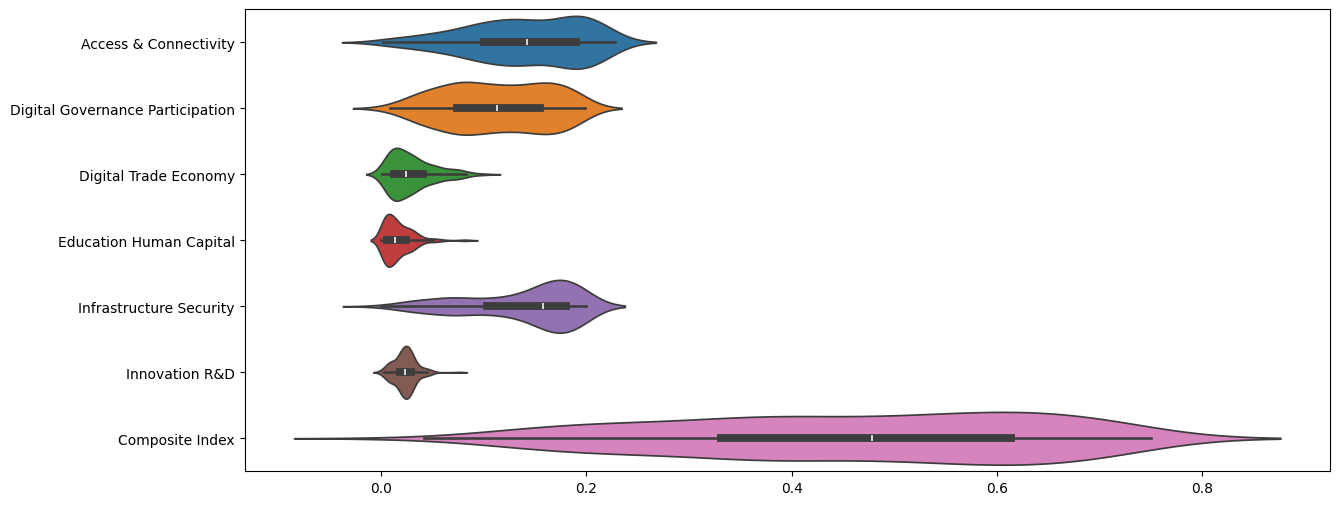

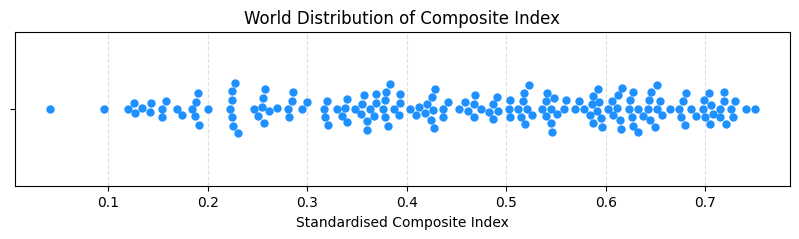

In [ ]:
df = pd.read_csv("composite_index.csv")

numeric_data = df.drop(columns=["Country"])

plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_data, orient="h")
plt.title("Boxplots for Subindices and Composite Index")
plt.xlabel("Normalised Scores")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=numeric_data, orient="h")

plt.figure(figsize=(10, 2))
sns.swarmplot(data=df, x="Composite Index", color="dodgerblue", size=6)

plt.title("World Distribution of Composite Index")
plt.xlabel("Standardised Composite Index")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

In [ ]:
df1 = pd.read_excel("cisco-dri.xlsx")
df2 = pd.read_csv("composite_index.csv")

df1 = df1[['Country', 'Overall DRI Score']]
df2 = df2[['Country', 'Composite Index']]

df1 = df1.dropna(subset=['Country', 'Overall DRI Score'])
df2 = df2.dropna(subset=['Country', 'Composite Index'])

merged_df = pd.merge(df1, df2, on='Country', how='inner')

scaler = MinMaxScaler()
merged_df['Normalized DRI Score'] = scaler.fit_transform(merged_df[['Overall DRI Score']])

result_df = merged_df[['Country', 'Normalized DRI Score', 'Composite Index']]

print(result_df)

                              Country  Normalized DRI Score  Composite Index
0                           Singapore              1.000000         0.730275
1                          Luxembourg              0.965270         0.595732
2                             Iceland              0.950263         0.727547
3            United States of America              0.933819         0.719031
4                              Sweden              0.902837         0.703645
..                                ...                   ...              ...
134                       Afghanistan              0.084652         0.095430
135  Democratic Republic of the Congo              0.078769         0.190700
136                           Liberia              0.077409         0.119589
137                           Eritrea              0.060640         0.154312
138          Central African Republic              0.000000         0.041476

[139 rows x 3 columns]


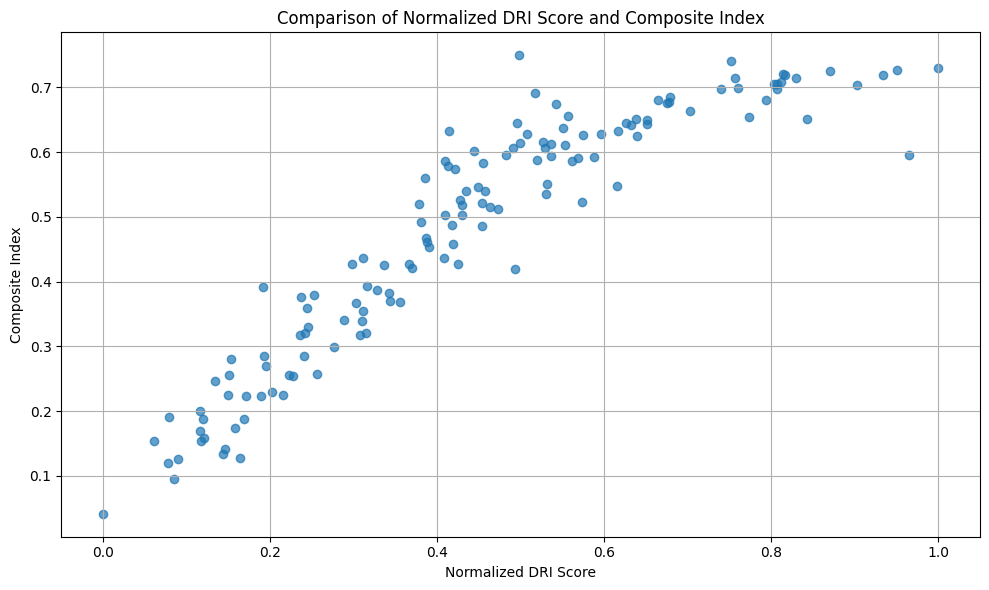

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Normalized DRI Score'], result_df['Composite Index'], alpha=0.7)

plt.xlabel('Normalized DRI Score')
plt.ylabel('Composite Index')
plt.title('Comparison of Normalized DRI Score and Composite Index')
plt.grid(True)

plt.tight_layout()
plt.show()

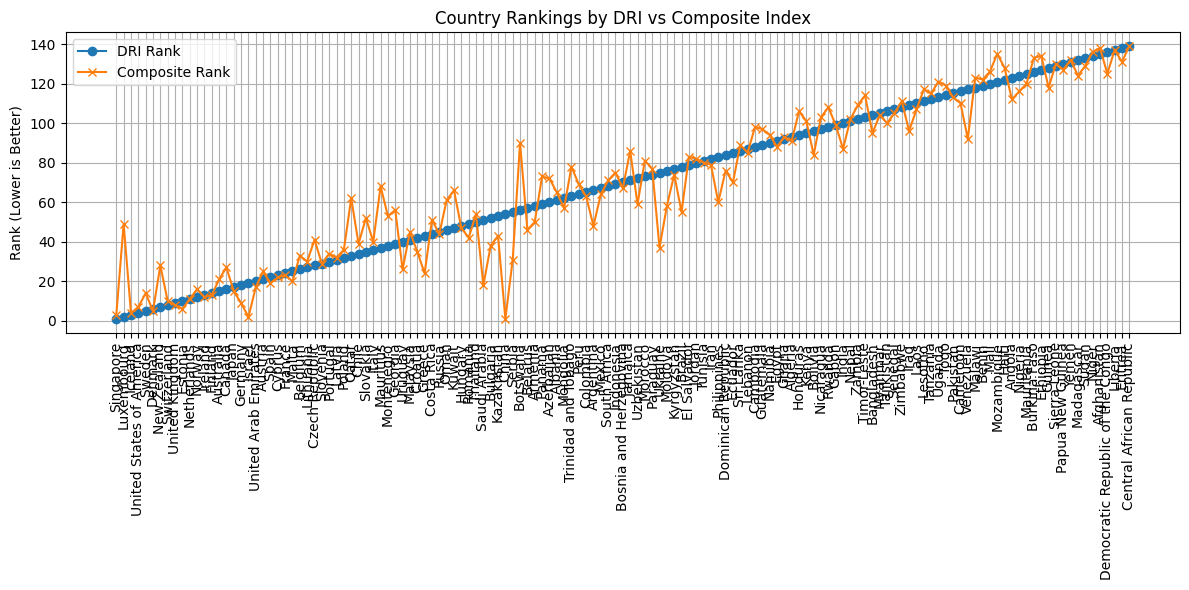

In [ ]:
result_df['DRI Rank'] = result_df['Normalized DRI Score'].rank(ascending=False)
result_df['Composite Rank'] = result_df['Composite Index'].rank(ascending=False)

sorted_df = result_df.sort_values(by='DRI Rank')

plt.figure(figsize=(12, 6))
plt.plot(sorted_df['Country'], sorted_df['DRI Rank'], label='DRI Rank', marker='o')
plt.plot(sorted_df['Country'], sorted_df['Composite Rank'], label='Composite Rank', marker='x')
plt.xticks(rotation=90)
plt.ylabel('Rank (Lower is Better)')
plt.title('Country Rankings by DRI vs Composite Index')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

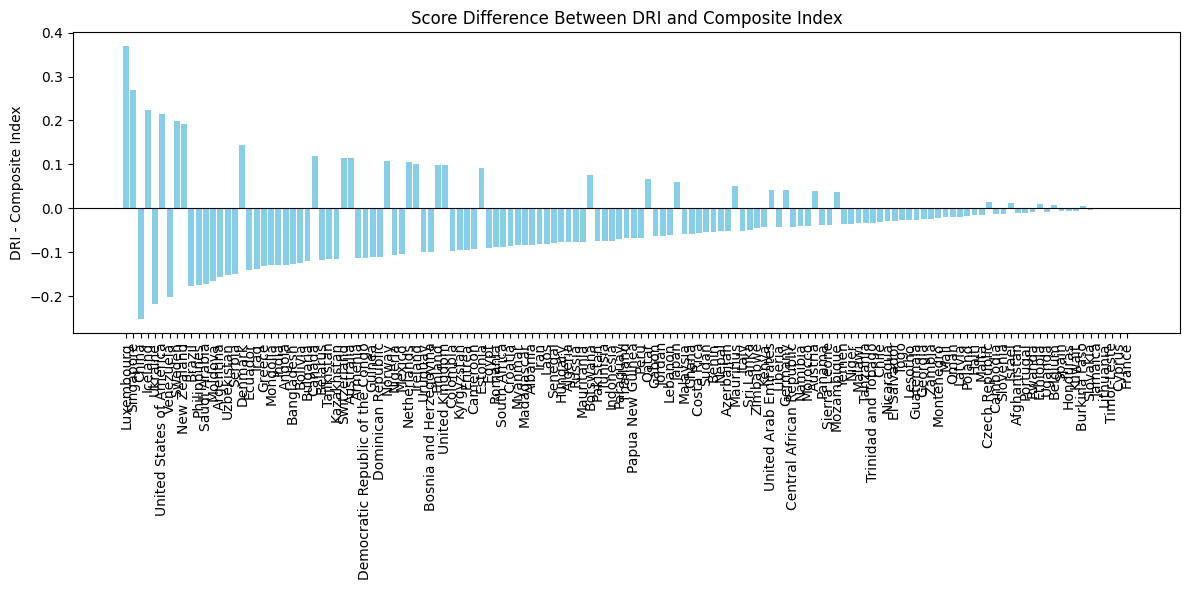

In [ ]:
result_df['Score Difference'] = result_df['Normalized DRI Score'] - result_df['Composite Index']

diff_df = result_df.sort_values(by='Score Difference', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(diff_df['Country'], diff_df['Score Difference'], color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=90)
plt.ylabel('DRI - Composite Index')
plt.title('Score Difference Between DRI and Composite Index')
plt.tight_layout()
plt.show()

Pearson correlation coefficient: 0.92, p-value: 0.0000


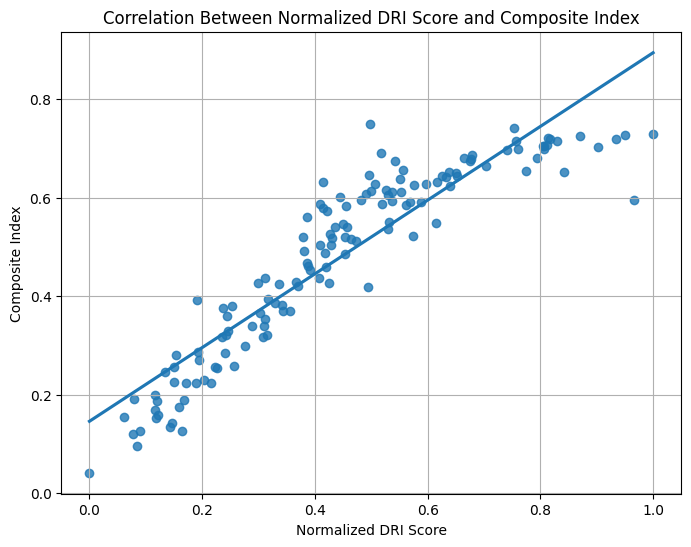

In [31]:
corr, p_val = pearsonr(result_df['Normalized DRI Score'], result_df['Composite Index'])
print(f"Pearson correlation coefficient: {corr:.2f}, p-value: {p_val:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='Normalized DRI Score', y='Composite Index', data=result_df, ci=None)
plt.title('Correlation Between Normalized DRI Score and Composite Index')
plt.grid(True)
plt.show()